# OBJECTIVES

## 1) Finish cleaning dataset
- replace values
- remove 'CL' and turn to ints

## 2) Scatter Plots/Sub Plots
- each personality vs each drug
- each personality score vs number of cl
- demographics vs cl and drugs

## 3) Machine learning
- test x features (5 ft of personality) against each drug
- test x features (5 ft of personality) against each cl
- lasso or similar regressor to determine importance of demographics
- is there a personality trait that most influences drug use??


In [45]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import numpy as np


In [46]:
columns = ["ID", "age", "sex", "education", "country", "ethinicity", "Nscore", "Escore",
           "Oscore", "Ascore", "Cscore", "impulsive", "SS", "alcohol", "amphet", "amyl",
           "benzos", "caff", "cannabis", "chocolate", "cocaine", "crack", "ecstasy", "heroin",
           "ketamine", "legalh", "LSD", "meth", "mushrooms", "nicotine", "semer", "VSA"]

df_drug = pd.read_csv("drug_consumption.data", names=columns)
df_drug.head(50)


,ID,age,sex,education,country,ethinicity,Nscore,Escore,Oscore,Ascore,...,ecstasy,heroin,ketamine,legalh,LSD,meth,mushrooms,nicotine,semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [47]:
# set female to 0, male to 1
df_drug['sex'] = df_drug['sex'].mask(
    df_drug['sex'] == 0.48246, 0).mask(df_drug['sex'] == -0.48246, 1)


In [48]:
# age dictionary
age_range = {-0.95197: '18-24',
             -0.07854: '25-34',
             0.49788: '35-44',
             1.09449: '45-45',
             1.82213: '55-64',
             2.59171: '65+'}

# education dictionary
education = {-2.43591: "left school before 16 years",
             -1.7379: "left school at 16 years",
             -1.43719: "left school at 17 years",
             -1.22751: "left scoool at 18 years",
             -0.61113: "some college or university, no college or degree",
             -0.05921: "professional certificate/diploma",
             0.45468: "university degree",
             1.16365: "masters degree",
             1.98437: "doctorate degree"}

# country dictionary
country = {-0.09765: "Australia",
           0.24923: "Canada",
           -0.46841: "New Zealand",
           -0.28519: "Other Country",
           0.21128: "Republic of Ireland",
           0.96082: "UK",
           -0.57009: "USA"}

# ethinicity dictionary
ethinicity = {-0.50212: "Asian",
              -1.10702: "Black",
              1.90725: "Mixed - Black/Asian",
              0.126: "Mixed - White/Asian",
              -0.22166: "Mixed - White/Black",
              0.1144: "Other Ethinicity",
              -0.31685: "White"}


In [49]:
url = 'https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified'
str_html = requests.get(url).text
soup = BeautifulSoup(str_html)


In [50]:
text = soup.find_all("p")[13].text


In [51]:
def float_to_string(value):
    """ convert values to floats, regardless of presence of a percentage sign 

    Arguments:
        value (str): value to be converted to a float

    Returns:
        float(value) (float): converted value
    """

    # check if value ends with a percentage sign
    if isinstance(value, str) and value.endswith('%'):
        # remove % sign, convert to float
        value = float(value.rstrip('%'))

    # convert value to float
    return float(value)


In [52]:
def FF_codes(start, end):
    """ converts a string segment into an organized dataframe

    Arguments:
        start (str): beginning of desired string segment
        end (str): ending of desired string segment

    Returns:
        score_df (pandas dataframe): final organized dataframe
    """

    # initialize dataframe
    score_df = pd.DataFrame(columns=["score", "cases", "value"])

    # isolate desired segment
    start_idx = text.index(start)
    end_idx = text.index(end)
    segment = text[start_idx:end_idx].splitlines()

    for line in segment[2:]:
        if line == "     Descriptive statistics":
            break

        else:
            # split each line into a list
            line_ls = line.split()

            count = 0
            for element in line_ls:

                # if value is the first of a triplet, add it to score column
                if count == 0:
                    score_df.loc[len(score_df)] = [
                        float_to_string(element), None, None]

                # if value is the second of a triplet, add it to score column
                elif count == 1:
                    score_df.loc[len(score_df) - 1,
                                 "cases"] = float_to_string(element)

                # if value is the third of a triplet, add it to score column
                elif count == 2:
                    score_df.loc[len(score_df) - 1,
                                 "value"] = float_to_string(element)
                    count = -1
                count += 1
    score_df = score_df.sort_values(
        by="score").reset_index().drop(columns=["index"])
    return score_df


In [53]:
nscore = FF_codes("7. Nscore (Real) is NEO-FFI-R Neuroticism.",
                  "8. Escore (Real) is NEO-FFI-R Extraversion.")
escore = FF_codes("8. Escore (Real) is NEO-FFI-R Extraversion.",
                  "9. Oscore (Real) is NEO-FFI-R Openness to experience.")
oscore = FF_codes("9. Oscore (Real) is NEO-FFI-R Openness to experience.",
                  "10. Ascore (Real) is NEO-FFI-R Agreeableness.")
ascore = FF_codes("10. Ascore (Real) is NEO-FFI-R Agreeableness.",
                  "11. Cscore (Real) is NEO-FFI-R Conscientiousness.")
cscore = FF_codes("11. Cscore (Real) is NEO-FFI-R Conscientiousness.",
                  "12. Impulsive (Real) is impulsiveness measured by BIS-11.")
impulsive = FF_codes("12. Impulsive (Real) is impulsiveness measured by BIS-11.",
                     "13. SS (Real) is sensation seeing measured by ImpSS.")
ss_percentage = FF_codes("13. SS (Real) is sensation seeing measured by ImpSS.",
                         "14. Alcohol is class of alcohol consumption.")


In [54]:
def drug_codes(start, end):
    """ converts a string segment into an organized dataframe

    Arguments:
        start (str): beginning of desired string segment
        end (str): ending of desired string segment

    Returns:
        drug_df (pandas dataframe): final organized dataframe
    """

    # initialize dataframe
    to_concat = []
    cl = ["CL0", "CL1", "CL2", "CL3", "CL4", "CL5", "CL6"]

    # isolate desired segment
    start_idx = text.index(start)
    end_idx = text.index(end)
    segment = text[start_idx:end_idx].splitlines()

    for line in segment[1:-1]:
        line_ls = line.split()[-8:]

        if segment[1:].index(line) == 0:
            drugs = line_ls[2:]

        elif segment[1:].index(line) != 1:
            segmented_line_ls = [line_ls[:2],
                                 line_ls[2:4], line_ls[4:6], line_ls[6:8]]

            for i in range(len(cl)):
                if i < len(segmented_line_ls):
                    c = cl[segment[1:].index(line) - 2]
                    pair = segmented_line_ls[i]
                    drug = drugs[i]
                    cases, fraction = pair

                    # create dictionary for row data
                    row_data = {"class": c, "drug": drug, "cases": float_to_string(
                        cases), "fraction": float_to_string(fraction)}

                    # add row to dataframe
                    to_concat.append(pd.DataFrame([row_data]))

    drug_df = pd.concat(to_concat, ignore_index=True)
    return drug_df


In [55]:
drug_set_1 = drug_codes("17. Benzos is class of benzodiazepine consumption.",
                        "18. Caff is class of caffeine consumption.")
drug_set_2 = drug_codes("21. Coke is class of cocaine consumption.",
                        "22. Crack is class of crack consumption.")
drug_set_2


,class,drug,cases,fraction
0,CL0,Caff,27.0,1.43
1,CL0,Cannabis,413.0,21.91
2,CL0,Choc,32.0,1.70
3,CL0,Coke,1038.0,55.07
4,CL1,Caff,10.0,0.53
5,CL1,Cannabis,207.0,10.98
6,CL1,Choc,3.0,0.16
7,CL1,Coke,160.0,8.49
8,CL2,Caff,24.0,1.27
9,CL2,Cannabis,266.0,14.11


In [56]:
# TODO - use new values to replace old ones in original dataframe


In [57]:
ls_drugs = ["alcohol", "amphet", "amyl",
            "benzos", "caff", "cannabis", "chocolate", "cocaine", "crack", "ecstasy", "heroin",
            "ketamine", "legalh", "LSD", "meth", "mushrooms", "nicotine", "semer", "VSA"]


In [58]:
"""
bins = np.linspace(0, 50, 51)

for idx, drug in enumerate(ls_drugs):

    # activate specifc subplot
    plt.subplot(6, 4, idx+1)

    # plot histogram
    plt.hist(df_drug[drug], bins=bins)
    plt.xlabel("Fan Pts")

    if idx == 0:
        plt.ylabel('Count')

    plt.gca().title.set_text(df_drug[drug][0])
    plt.ylim(0, 20)

    idx += 1


plt.gcf().set_size_inches(18, 6)
"""


'\nbins = np.linspace(0, 50, 51)\n\nfor idx, drug in enumerate(ls_drugs):\n\n    # activate specifc subplot\n    plt.subplot(6, 4, idx+1)\n\n    # plot histogram\n    plt.hist(df_drug[drug], bins=bins)\n    plt.xlabel("Fan Pts")\n\n    if idx == 0:\n        plt.ylabel(\'Count\')\n\n    plt.gca().title.set_text(df_drug[drug][0])\n    plt.ylim(0, 20)\n\n    idx += 1\n\n\nplt.gcf().set_size_inches(18, 6)\n'

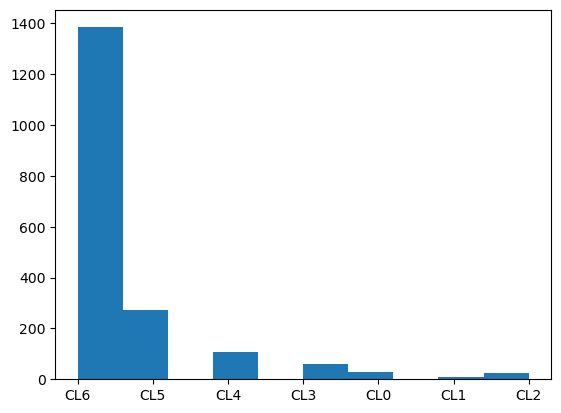

In [59]:
# Set the order you prefer for the x-axis labels
order = ["CL0", "CL1", "CL2", "CL3", "CL4", "CL5", "CL6"]
# Create a histogram with Matplotlib
plt.hist(df_drug["caff"])

# Set the x-axis labels and their order


# Show the plot
plt.show()


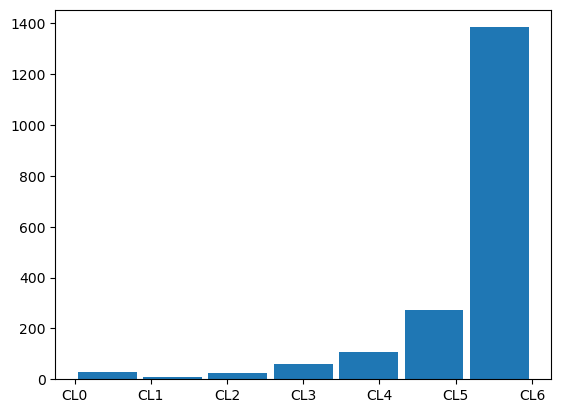

In [60]:
def create_hist(col, df_drug):
    # data = ['CL5', 'CL6', 'CL4', 'CL2', 'CL1', 'CL0', 'CL3', 'CL0', 'CL3', 'CL1']

    # Create a DataFrame
    # df = pd.DataFrame({'class': data})

    # Set the order you prefer for the x-axis labels
    order = ["CL0", "CL1", "CL2", "CL3", "CL4", "CL5", "CL6"]

    # Sort the DataFrame based on the desired order
    df_drug[col] = pd.Categorical(
        df_drug[col], categories=order, ordered=True)
    df_drug = df_drug.sort_values(by=col)

    # Create a histogram with Matplotlib
    plt.hist(df_drug[col], bins=len(order), rwidth=0.9)

    # Set the x-axis labels
    plt.xticks(range(len(order)), order)

    # Show the plot
    plt.show()


create_hist("caff", df_drug)


In [61]:
ls_drugs = ["alcohol", "amphet", "amyl",
            "benzos", "caff", "cannabis", "chocolate", "cocaine", "crack", "ecstasy", "heroin",
            "ketamine", "legalh", "LSD", "meth", "mushrooms", "nicotine",  "VSA"]

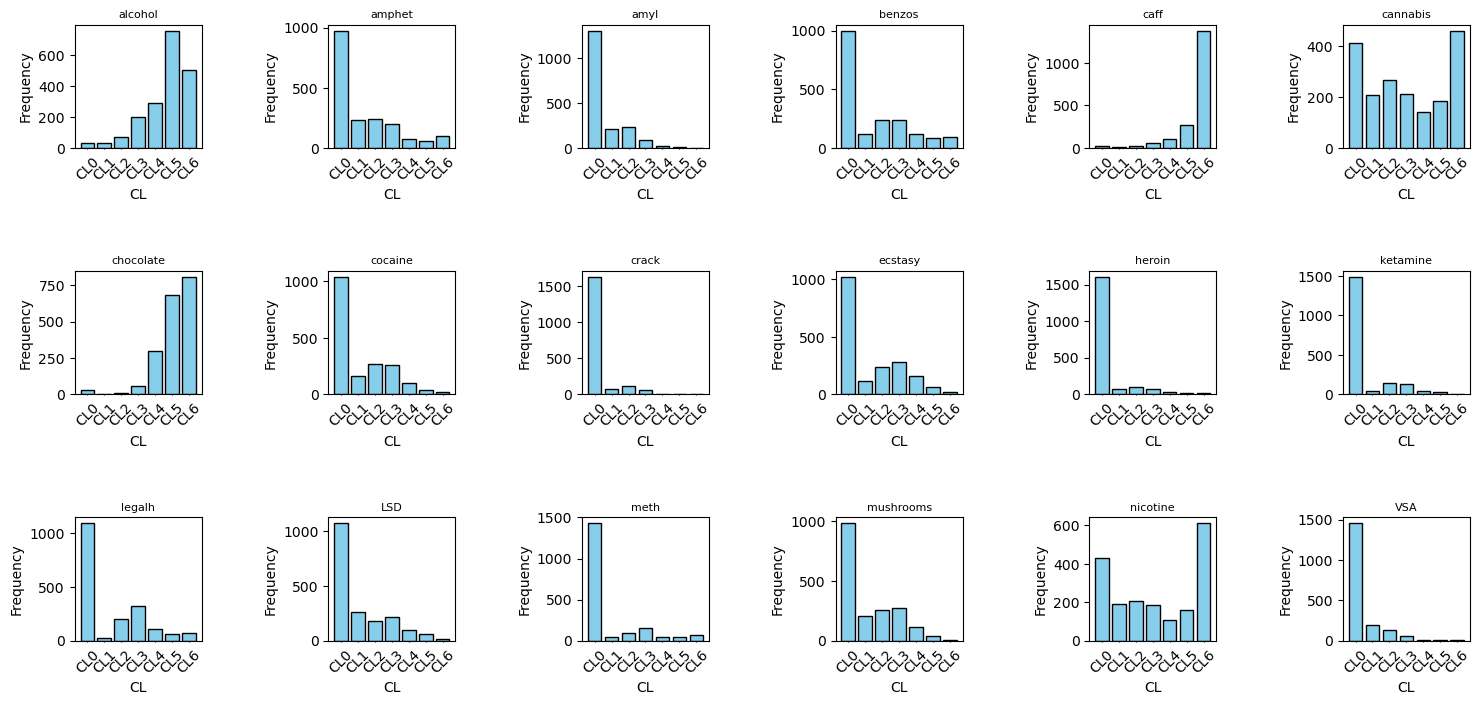

In [62]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.linspace(0, 50, 51)
order = ["CL0", "CL1", "CL2", "CL3", "CL4", "CL5", "CL6"]

# Create a figure with a grid of subplots (3 rows and 6 columns)
fig, axes = plt.subplots(3, 6, figsize=(18, 8))  # Adjust the height of the figure

# Iterate through drugs and their corresponding subplots
for idx, drug in enumerate(ls_drugs):
    row = idx // 6
    col = idx % 6

    # Select the subplot
    ax = axes[row, col]

    # Calculate the frequency of each "CL" category for the current drug
    drug_counts = df_drug[drug].value_counts().reindex(order, fill_value=0)

    # Plot a bar chart showing the frequency of each "CL" category
    ax.bar(drug_counts.index, drug_counts.values, color='skyblue', edgecolor='k')
    ax.set_xlabel("CL")
    ax.set_ylabel("Frequency")
    ax.set_title(drug, fontsize=8, pad=5)  # Set the drug name as the subplot title
    ax.tick_params(axis='x', rotation=45, size = 1) 

# Adjust the layout of the subplots and increase the spacing between rows
plt.subplots_adjust(hspace=1, wspace = 1)  # Adjust the height spacing between subplots

plt.show()